In [2]:
import pandas as pd
data=pd.read_csv('../input/hotels/hotel.csv')
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [4]:
X = data.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

In [5]:
#Numerical features
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
#Categorical features
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [8]:
#Preprocessing of data
num_transformer=make_pipeline(
SimpleImputer(strategy='constant'),
StandardScaler(),
)

cat_transformer=make_pipeline(
    SimpleImputer(strategy='constant',fill_value='NA'),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor=make_column_transformer(
(num_transformer,features_num),
(cat_transformer,features_cat),
)



In [9]:
#Splitting data into training and validation data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
X_train=preprocessor.fit_transform(X_train)
X_valid=preprocessor.transform(X_valid)

In [10]:
input_shape = [X_train.shape[1]]

In [11]:
from tensorflow import keras
from tensorflow.keras import layers,callbacks

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
])
early_stop=callbacks.EarlyStopping(min_delta=0.001,patience=10,restore_best_weights=True)

2024-07-05 19:59:08.798775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 19:59:08.798960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 19:59:08.938274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['binary_accuracy'],)

In [15]:
hd=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=512,epochs=200,callbacks=[early_stop],)

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - binary_accuracy: 0.7410 - loss: 0.5456 - val_binary_accuracy: 0.7969 - val_loss: 0.4318
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - binary_accuracy: 0.7996 - loss: 0.4264 - val_binary_accuracy: 0.8129 - val_loss: 0.4020
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8089 - loss: 0.4088 - val_binary_accuracy: 0.8169 - val_loss: 0.3944
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8104 - loss: 0.4037 - val_binary_accuracy: 0.8170 - val_loss: 0.3907
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - binary_accuracy: 0.8146 - loss: 0.3975 - val_binary_accuracy: 0.8210 - val_loss: 0.3859
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8191 - loss: 0.3924 - val_binary_accuracy: 0.8228 - val_loss: 0.3832
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8206 - loss: 0.3893 - val_binary_accuracy: 0.8250 - val_loss:

/tmp/ipykernel_33/1172918859.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: title={'center': 'Accuracy'}>

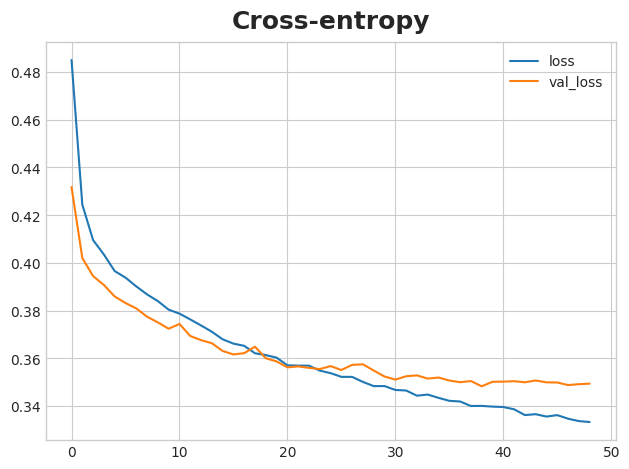

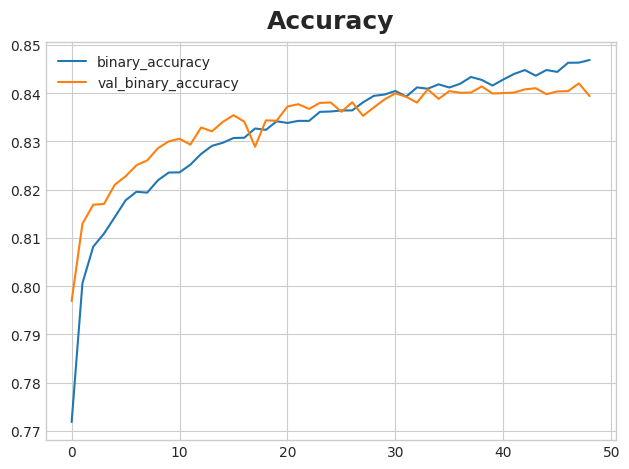

In [16]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
hd_df=pd.DataFrame(hd.history)
hd_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
hd_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [18]:
print(f"Best val_loss is {hd_df['val_loss'].min()}")
print(f"Best val_accuracy is {hd_df['val_binary_accuracy'].max()}")

Best val_loss is 0.3482483923435211
Best val_accuracy is 0.8420329689979553
